In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 575 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 6.9 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 8.8 MB 58.0 MB/s 
     |████████████████████████████████| 468 kB 60.7 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=bb880592a5b68a3a966ef90a4602f763e22d13b370391438cc735ad260ead4f9
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
DPI_dataset = pd.read_csv("/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_F.csv", parse_dates = True, index_col = "Date")
DPI_dataset

,aum,token_a_amount,net_flow,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,DPI_price,BNB_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-13,13413076.12,5865.240742,314475.05190,3.403257,51.136552,581.773174,4.537299,115.628708,90.667556,30.948076,...,2.98,23.97,0.79,80.4,55.4,4.8,0.96,3511.93,11863.90,0.09
2020-10-14,14039166.27,5581.629425,729329.67920,3.256042,52.657986,578.352472,4.451809,111.031146,90.329064,30.812868,...,2.98,23.97,0.79,80.4,55.4,4.8,0.97,3488.67,11768.73,0.09
2020-10-15,14293954.95,6430.021359,861171.96300,3.056167,47.815486,564.597854,4.150760,107.247875,86.287976,31.051792,...,2.98,23.97,0.83,80.4,55.4,4.8,0.93,3483.34,11713.87,0.10
2020-10-16,13884925.20,4341.712775,344120.71360,3.139778,41.638785,548.252076,3.987229,103.699465,81.499069,30.483722,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
2020-10-17,13584918.72,4010.875556,-30418.51613,3.047424,41.185764,552.822896,3.938792,103.807257,80.040273,30.277444,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,28167929.92,801.573962,0.00000,5.843785,75.897042,657.364250,2.463340,61.694049,78.549262,273.705778,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-24,28644520.91,568.615424,0.00000,5.917444,76.513681,680.139806,2.490632,62.430549,80.047552,279.295972,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-25,28202207.10,385.704346,0.00000,5.836500,75.651299,693.700187,2.405306,62.453069,79.329145,275.817167,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99


In [7]:
DPI_Factor = DPI_dataset.copy() 
Net_Flow = DPI_Factor['net_flow'] 
DPI_Factor = DPI_Factor.drop(columns=['net_flow'])


# MVI_Factor = MVI_Factor.drop(['10yr_bond', 'Fed_funds_rate', 'ISM_Manufacturing', 'Price', 
#                               'Hourly_earnings', 'ilv_price', 'ygg_price', 'SPX', 'AUM', 
#                               'Economic_surprises', 'nftx_price', 'WBTC_Price', 
#                               'Inflation_surprises', 'Inflation_PCE', 'ern_price', 'rly_price', 
#                               'revv_price', 'whale_price', 'WETH_Price', 'CFG_Classification'], axis=1, inplace=False)
DPI_Factor

,aum,token_a_amount,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,DPI_price,BNB_price,WBTC_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-13,13413076.12,5865.240742,3.403257,51.136552,581.773174,4.537299,115.628708,90.667556,30.948076,11451.24946,...,2.98,23.97,0.79,80.4,55.4,4.8,0.96,3511.93,11863.90,0.09
2020-10-14,14039166.27,5581.629425,3.256042,52.657986,578.352472,4.451809,111.031146,90.329064,30.812868,11417.49765,...,2.98,23.97,0.79,80.4,55.4,4.8,0.97,3488.67,11768.73,0.09
2020-10-15,14293954.95,6430.021359,3.056167,47.815486,564.597854,4.150760,107.247875,86.287976,31.051792,11418.63060,...,2.98,23.97,0.83,80.4,55.4,4.8,0.93,3483.34,11713.87,0.10
2020-10-16,13884925.20,4341.712775,3.139778,41.638785,548.252076,3.987229,103.699465,81.499069,30.483722,11361.88472,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
2020-10-17,13584918.72,4010.875556,3.047424,41.185764,552.822896,3.938792,103.807257,80.040273,30.277444,11349.52790,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,28167929.92,801.573962,5.843785,75.897042,657.364250,2.463340,61.694049,78.549262,273.705778,19079.32568,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-24,28644520.91,568.615424,5.917444,76.513681,680.139806,2.490632,62.430549,80.047552,279.295972,19099.47547,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
2022-09-25,28202207.10,385.704346,5.836500,75.651299,693.700187,2.405306,62.453069,79.329145,275.817167,19004.21210,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99


In [8]:
#Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi_square_value, p_value = calculate_bartlett_sphericity(DPI_Factor)
chi_square_value,p_value 

# p_value = 0 ->> corr matrix != identity matrix ->> FA :)
#The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

(46327.26018484111, 0.0)

In [9]:
#Kaiser-Meyer-Olkin Test
kmo_all, kmo_model = calculate_kmo(DPI_Factor)
kmo_model

# KMO_value approaches 1 ->> FA :)

0.8425733350560843

# Standardization

In [10]:
from factor_analyzer import FactorAnalyzer
#Standardization
def standard_scale(df):
  feature_names = [x for x in df.columns if x not in ['event_crypto_ban', 'event_metaverse', 'event_luna', 'event_3AC_miss', 'event_the_Merge']]
  df_ = df.copy()
  for name in feature_names:
    mu = df[name].mean()
    sigma = df[name].std()
    df_[name] = (df[name] - mu) / sigma
  
  return df_



In [11]:
DPI_Factor_Scale = standard_scale(DPI_Factor)
DPI_Factor_Scale

,aum,token_a_amount,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,DPI_price,BNB_price,WBTC_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-13,-1.415518,-0.034092,-1.202045,-1.290376,-1.340523,-0.706827,-0.743840,-1.112280,-1.750990,-1.929394,...,-1.368632,-1.208058,2.200519,0.801303,-1.083318,0.096317,1.826763,-1.886371,-1.195779,-0.424615
2020-10-14,-1.405514,-0.077060,-1.216470,-1.278820,-1.343727,-0.721481,-0.769982,-1.114709,-1.751795,-1.931829,...,-1.368632,-1.208058,2.200519,0.801303,-1.083318,0.096317,1.844388,-1.953856,-1.266027,-0.424615
2020-10-15,-1.401443,0.051473,-1.236054,-1.315602,-1.356608,-0.773083,-0.791493,-1.143708,-1.750373,-1.931747,...,-1.368632,-1.208058,2.349263,0.801303,-1.083318,0.096317,1.773890,-1.969321,-1.306522,-0.410555
2020-10-16,-1.407978,-0.264909,-1.227862,-1.362519,-1.371915,-0.801114,-0.811669,-1.178073,-1.753755,-1.935841,...,-1.368632,-1.208058,2.423635,0.801303,-1.083318,0.096317,1.668145,-1.967957,-1.337752,-0.424615
2020-10-17,-1.412772,-0.315032,-1.236911,-1.365960,-1.367635,-0.809416,-0.811056,-1.188541,-1.754984,-1.936733,...,-1.368632,-1.208058,2.423635,0.801303,-1.083318,0.096317,1.668145,-1.967957,-1.337752,-0.424615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,-1.179759,-0.801246,-0.962917,-1.102303,-1.269734,-1.062320,-1.050510,-1.199241,-0.305483,-1.379057,...,0.624415,-1.084827,-1.332138,-1.245145,-1.987826,0.452219,-1.186989,-1.360356,-1.930941,3.652811
2022-09-24,-1.172144,-0.836540,-0.955700,-1.097620,-1.248406,-1.057642,-1.046322,-1.188489,-0.272196,-1.377603,...,0.624415,-1.084827,-1.332138,-1.245145,-1.987826,0.452219,-1.186989,-1.360356,-1.930941,3.652811
2022-09-25,-1.179212,-0.864251,-0.963631,-1.104170,-1.235707,-1.072268,-1.046194,-1.193644,-0.292911,-1.384476,...,0.624415,-1.084827,-1.332138,-1.245145,-1.987826,0.452219,-1.186989,-1.360356,-1.930941,3.652811


In [12]:
Net_Flow_Scale = (Net_Flow - Net_Flow.mean()) / Net_Flow.std()
#Net_Flow_Scale.columns = ['Date', 'Scaled_Net_Flow']
Net_Flow_Scale.to_frame()
Net_Flow_Scale.column = ['Net_Flow_Scale'] 
Net_Flow_Scale

Date
2020-10-13    0.115441
2020-10-14    0.416343
2020-10-15    0.511971
2020-10-16    0.136943
2020-10-17   -0.134718
                ...   
2022-09-23   -0.112655
2022-09-24   -0.112655
2022-09-25   -0.112655
2022-09-26   -0.285440
2022-09-27   -0.173452
Name: net_flow, Length: 715, dtype: float64

# Eigen V & Common Factor

In [13]:
#Calculate Correlation Matrix
C = DPI_Factor_Scale.corr() 

In [14]:
fa = FactorAnalyzer(27, rotation = None)
fa.fit(DPI_Factor_Scale)
eig_value,eig_vector = fa.get_eigenvalues() 

In [15]:
#Calculate eig_value & eig_vector
eig = pd.DataFrame()
eig['names'] = DPI_Factor_Scale.columns
eig['eig_value'] = eig_value 
eig
## 5 factors have eigen_value > 1 -->> the number of factor should be 5  

,names,eig_value
0,aum,12.336141
1,token_a_amount,6.470635
2,UNI_price,2.082637
3,AAVE_price,1.658501
4,MKR_price,1.146024
5,SNX_price,0.893209
6,COMP_price,0.731565
7,DPI_price,0.581803
8,BNB_price,0.240904
9,WBTC_price,0.182572


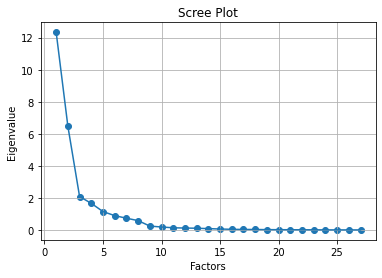

In [16]:
plt.scatter(range(1,DPI_Factor_Scale.shape[1]+1),eig_value)
plt.plot(range(1,DPI_Factor_Scale.shape[1]+1),eig_value)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() 

# Performing Factor Analysis

In [17]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(DPI_Factor_Scale) 

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [18]:
Loading_Matrix = DataFrame(fa.loadings_,columns = ['Factor1','Factor2','Factor3','Factor4','Factor5'])
Loading_Matrix['name'] = DPI_Factor_Scale.columns
Loading_Matrix.set_index('name') 

,Factor1,Factor2,Factor3,Factor4,Factor5
name,,,,,
aum,0.645748,0.228156,0.674017,0.053165,0.109811
token_a_amount,0.139546,0.345243,-0.228024,-0.133769,0.192126
UNI_price,0.876404,0.191976,0.343122,0.024772,0.188703
AAVE_price,0.892183,0.240219,0.271402,0.031556,0.158104
MKR_price,0.715662,0.183789,0.504096,0.212208,0.289419
SNX_price,0.876895,0.353064,-0.121401,-0.068816,-0.000606
COMP_price,0.859884,0.337166,0.156708,0.007623,0.298624
DPI_price,0.902183,0.296750,0.286537,0.030241,0.126295
BNB_price,0.405628,-0.194293,0.749226,0.263092,-0.032493


Text(113.09375, 0.5, 'Factors')

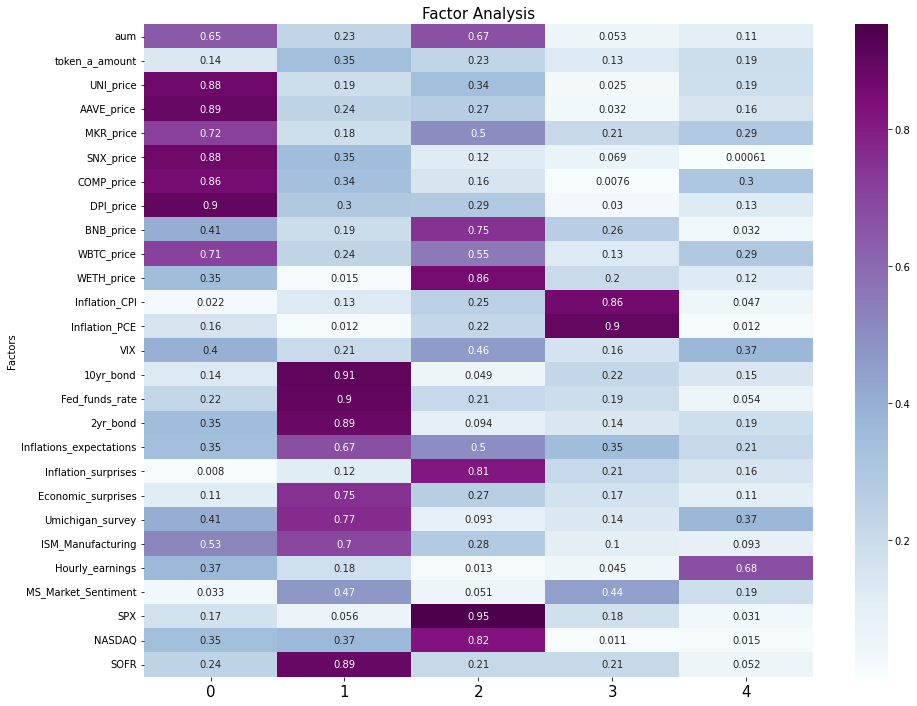

In [19]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=DPI_Factor_Scale.columns) 

fig,ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax) 
ax.tick_params(axis='x',labelsize=15) 
ax.set_title("Factor Analysis",fontsize=15) 
ax.set_ylabel("Factors") 

In [20]:
FA_Variance = DataFrame(fa.get_factor_variance(),columns = ['Factor1','Factor2','Factor3','Factor4','Factor5'])
FA_Variance['name'] = ['SS_Loadings','Proportion_Var','Cumulative_Var'] 
FA_Variance.set_index('name') 

,Factor1,Factor2,Factor3,Factor4,Factor5
name,,,,,
SS_Loadings,6.924795,6.516533,5.758049,2.395627,1.322959
Proportion_Var,0.256474,0.241353,0.213261,0.088727,0.048998
Cumulative_Var,0.256474,0.497827,0.711088,0.799815,0.848813


In [21]:
DPI_FA = pd.DataFrame(fa.transform(DPI_Factor_Scale),columns = ['Factor1','Factor2','Factor3','Factor4','Factor5'])
DPI_FA

,Factor1,Factor2,Factor3,Factor4,Factor5
0,-1.320508,1.420059,-1.818018,-0.309171,0.428869
1,-1.265121,1.425589,-1.916774,-0.258778,0.358335
2,-1.327011,1.408543,-1.829475,-0.306262,0.401234
3,-1.493235,1.421792,-1.715991,-0.334155,0.588785
4,-1.530412,1.430089,-1.701696,-0.334001,0.632094
...,...,...,...,...,...
710,0.423913,-3.123504,-1.217469,-1.948994,0.313692
711,0.428814,-3.106355,-1.248355,-1.939851,0.327889
712,0.440581,-3.126067,-1.221936,-1.937765,0.325120
713,0.502267,-3.103253,-1.448074,-1.829120,0.530514


# Plot

In [22]:
def plot_actual_vs_predicted_y(y_actual, y_predict):
  plt.rcParams['figure.figsize'] = (10.0, 10.0)
  # plt.plot(y_train.index, y_train, label='Net Flow d1')
  plt.title('Linear Regression')
  plt.plot(y_actual, label='True y')
  plt.plot(y_predict, color='green', label='Predicted Y')
  plt.legend() 

In [23]:
def plot_scatter(x, y, model_name):
  plt.rcParams['figure.figsize'] = (6.0, 6.0)
  min_x = min_y = min(floor(min(x)), floor(min(y)))
  max_x = max_y = max(ceil(max(x)), ceil(max(y)))
  ideal_x = np.linspace(min_x, max_x, len(x))
  ideal_y = np.linspace(min_y, max_y, len(y))
  plt.plot(ideal_x, ideal_y, '#01b8ac')      # light blue：'#5ccfee'
  plt.scatter(x, y, c='#115f8a')    #01b8ac
  plt.title(str(model_name) + ': Actual Y vs Predicted Y')
  plt.xlabel('Actual Y')
  plt.ylabel('Predicted Y')
  plt.show() 

# Model

In [24]:
from tqdm import tqdm 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb # visulization
from math import floor, ceil
import seaborn as sb

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

## OLS

In [25]:
import statsmodels.api as sm

def build_ordinary_least_square(x, y):
    X = sm.add_constant(x)
    ols_model = sm.OLS(y, X).fit()
    pred = ols_model.predict(X)
    ols_report = ols_model.summary()
    return pred, ols_report

In [26]:
pred, ols_report = build_ordinary_least_square(DPI_FA.values, Net_Flow.values)
print(ols_report) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     10.04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.68e-09
Time:                        02:50:08   Log-Likelihood:                -11097.
No. Observations:                 715   AIC:                         2.221e+04
Df Residuals:                     709   BIC:                         2.223e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.553e+05      5e+04      3.106      0.0

## Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(DPI_FA, Net_Flow, test_size=0.2, 
                                                    random_state=0, shuffle=True)
# 80% training 20% test # random_state=0 

x_train_std, x_test_std, y_train, y_test = train_test_split(DPI_FA, Net_Flow, test_size=0.2, 
                                                            random_state=1, shuffle=True)
# 80% training 20% test # random_state=1 

## Linear Regression

In [28]:
lr_model = linear_model.LinearRegression(fit_intercept=True)
lr = lr_model.fit(x_train, y_train)
y_hat = lr.predict(x_test)
rmse_lr = r2_score(y_test, y_hat)
print("Test set R-squared is: {:.8f}".format(rmse_lr)) 

Test set R-squared is: -0.02872796


## SVR

In [29]:
svr_model = SVR(kernel="rbf", C=200000, gamma=10.5) 
svr = svr_model.fit(x_train, y_train)
y_hat_svr = svr.predict(x_test)
rmse_svr = r2_score(y_test, y_hat_svr)
print("Training set R-squared is: {:.8f}".format(rmse_svr)) 

Training set R-squared is: -0.00263339


## Random Forest

In [30]:
rf_model = RandomForestRegressor(n_estimators = 100000)
# rf_model = rf_cross_validation(x_train, y_train)
rf = rf_model.fit(x_train, y_train)
y_hat_rf = rf.predict(x_test_std)
rmse_rf = r2_score(y_test, y_hat_rf)
print("Testing set R-squared is: {:.8f}".format(rmse_rf)) 

Testing set R-squared is: -0.54909317
